In [5]:
import os

import pickle
from joblib import Parallel, delayed
import cvxpy as cp
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from tqdm import tqdm

from src.CPQAOA import CP_QAOA
from src.QAOA import QAOA
from src.Grid import Grid
from src.Chain import Chain
from src.Tools import (portfolio_metrics, 
                       min_cost_partition, 
                       get_qubo, 
                       normalized_cost, 
                       qubo_limits, 
                       check_qubo,
                       partitioned_averages)

In [6]:
time_results = []
iter_results = []
N_range= range(2,25)
for seed in tqdm(range(0,10)):
    times = []
    iters = []
    for N in N_range:
        k = N // 2

        # alpha in: s^T*mu + alpha*(s^T*Covar*s)
        alpha=0.5
        # Generating random problem instance 
        expected_returns, covariances = portfolio_metrics(n=N, seed=seed)
        w = cp.Variable(shape=(N,),name='weights',integer=True)
        objective = cp.Minimize(-expected_returns.T@w + alpha*cp.quad_form(w,covariances))
        constraints = [cp.sum(w) == k]
        problem = cp.Problem(objective=objective, constraints=constraints)
        problem.solve(solver=cp.GUROBI, verbose=False)
        stat, val, time, iter = problem.status, problem.value, problem.solver_stats.solve_time, problem.solver_stats.num_iters
        times.append(time)
        iters.append(iter)
    time_results.append(times)
    iter_results.append(iters)

  0%|          | 0/10 [00:00<?, ?it/s]

Restricted license - for non-production use only - expires 2025-11-24


100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


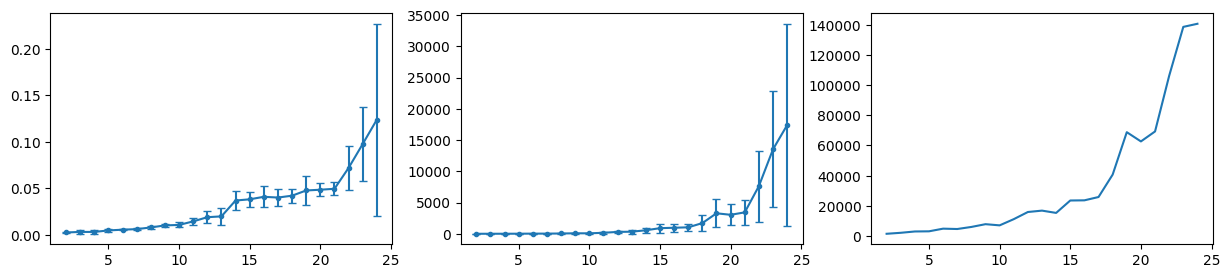

In [7]:
fig, ax = plt.subplots(1,3,figsize=(15,3))
ax[0].errorbar(list(N_range), np.mean(time_results,axis=0), yerr=np.std(time_results,axis=0),fmt='.-', capsize=3)
ax[1].errorbar(list(N_range), np.mean(iter_results,axis=0), yerr=np.std(iter_results,axis=0),fmt='.-', capsize=3)
ax[2].plot(list(N_range), np.mean(iter_results,axis=0)/np.mean(time_results,axis=0))

